In [1]:
pwd

'/Users/surajpawar/Desktop/Machine learning algorithms_sklearn'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
pd.read_csv("/Users/surajpawar/Desktop/Machine learning algorithms_sklearn/magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("/Users/surajpawar/Desktop/Machine learning algorithms_sklearn/magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [7]:
df["class"]=(df["class"]=="g").astype(int)

In [8]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [20]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [18]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    data = np.hstack((X, np.reshape(y, (-1,1))))
    
    return data, X, y

In [21]:
train, X_train, y_train = scale_dataset(train, oversample=False)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)

In [22]:
import tensorflow as tf

2023-07-23 21:13:19.513629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    
    return nn_model, history

In [26]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binart crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()

16 nodes, dropout 0, lr 0.01, batch_size 32


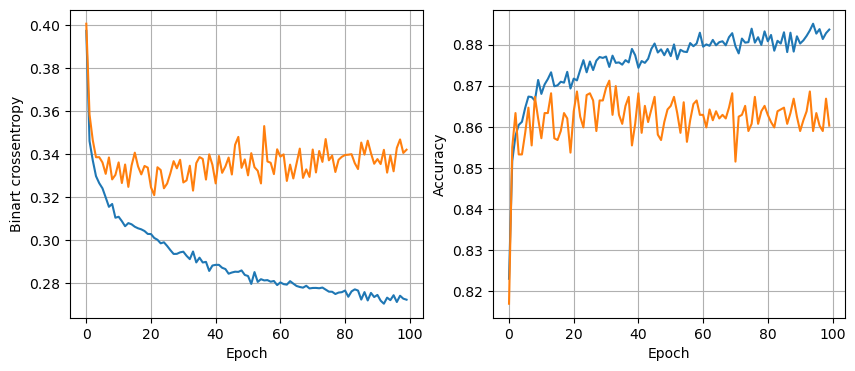

16 nodes, dropout 0, lr 0.01, batch_size 64


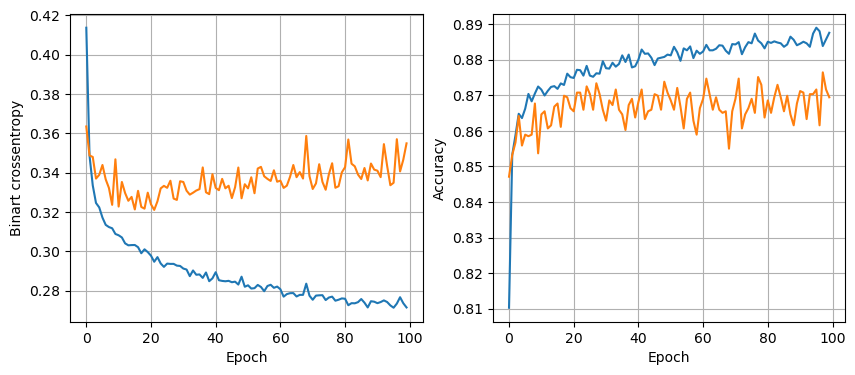

16 nodes, dropout 0, lr 0.01, batch_size 128


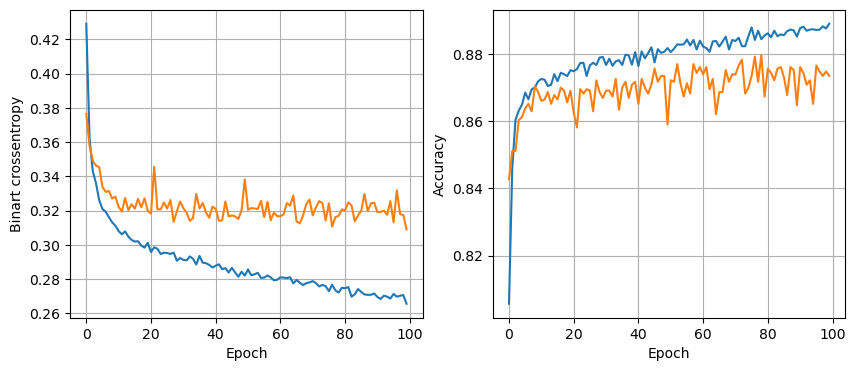

16 nodes, dropout 0, lr 0.005, batch_size 32


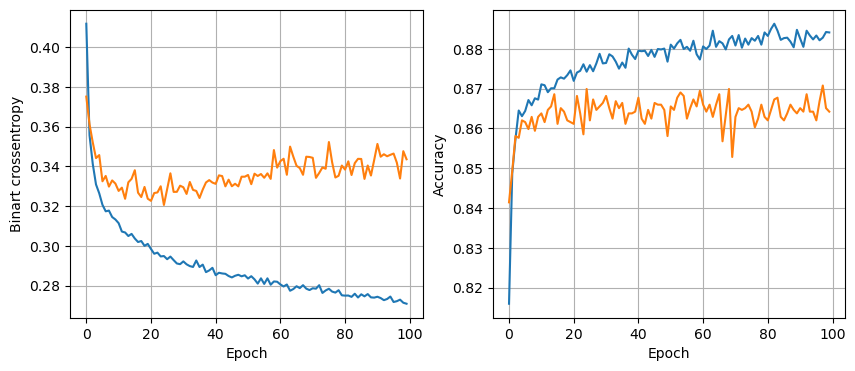

16 nodes, dropout 0, lr 0.005, batch_size 64


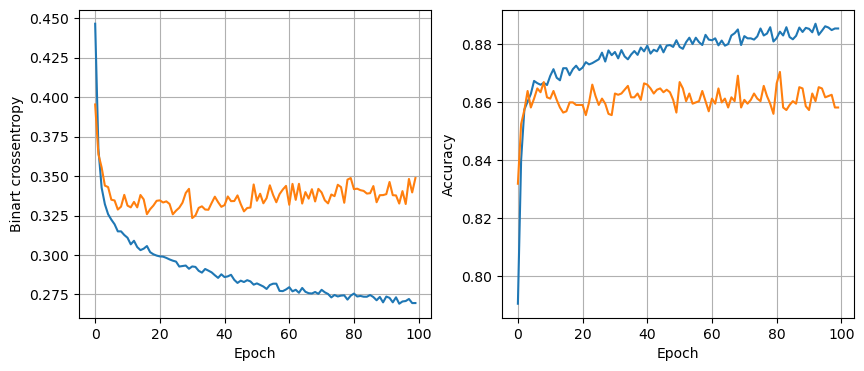

16 nodes, dropout 0, lr 0.005, batch_size 128


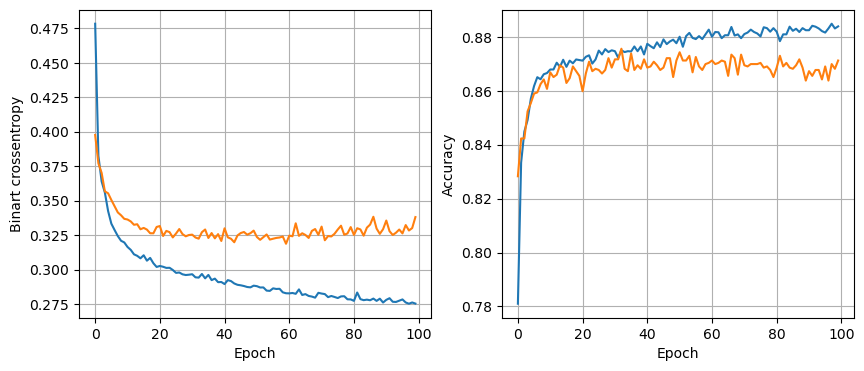

16 nodes, dropout 0, lr 0.001, batch_size 32


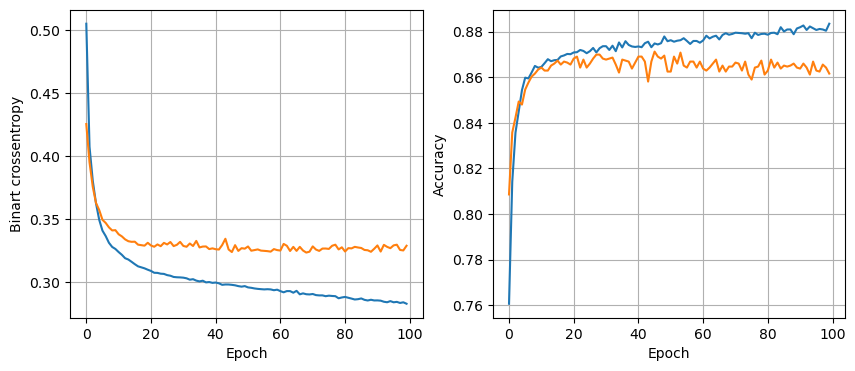

16 nodes, dropout 0, lr 0.001, batch_size 64


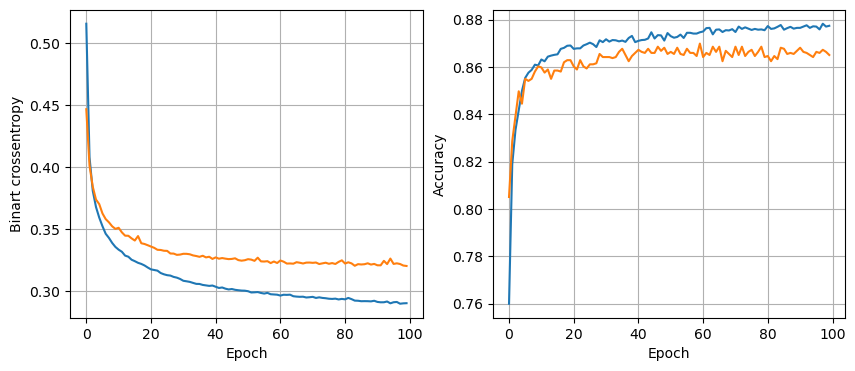

16 nodes, dropout 0, lr 0.001, batch_size 128


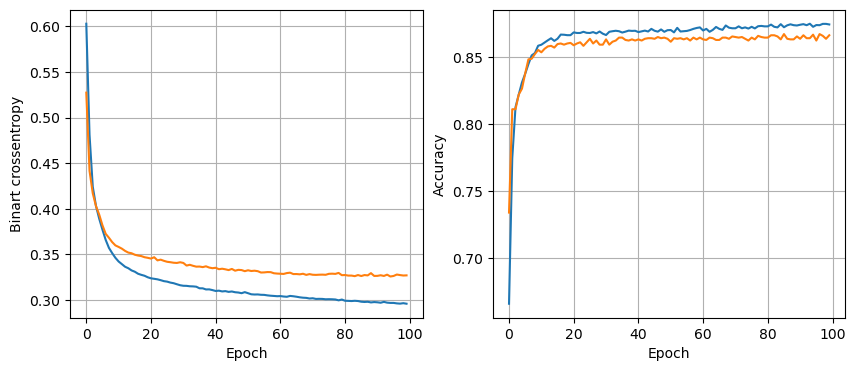

16 nodes, dropout 0.2, lr 0.01, batch_size 32


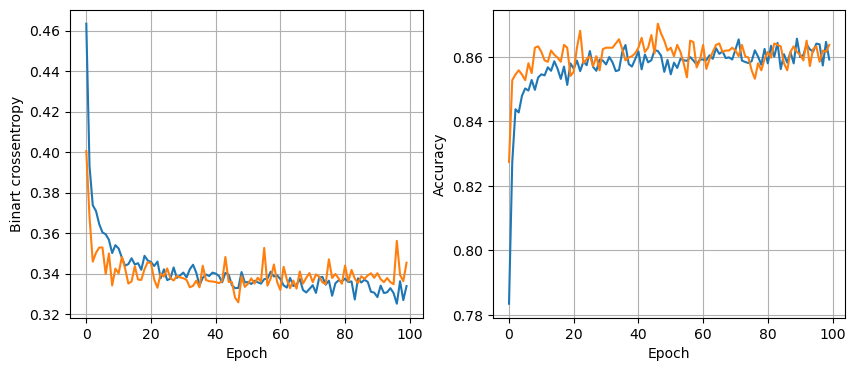

16 nodes, dropout 0.2, lr 0.01, batch_size 64


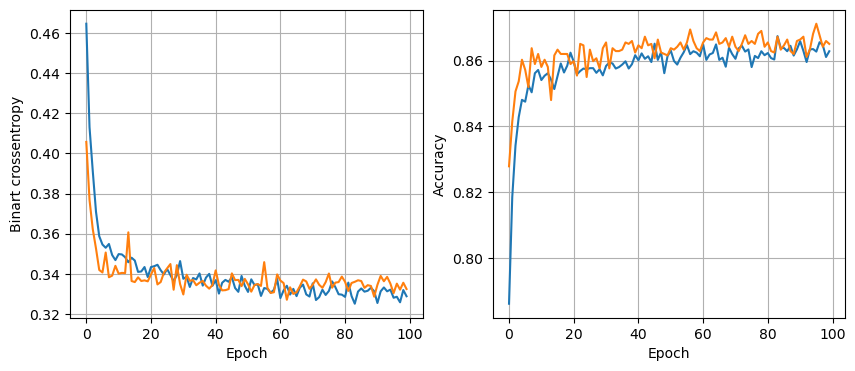

16 nodes, dropout 0.2, lr 0.01, batch_size 128


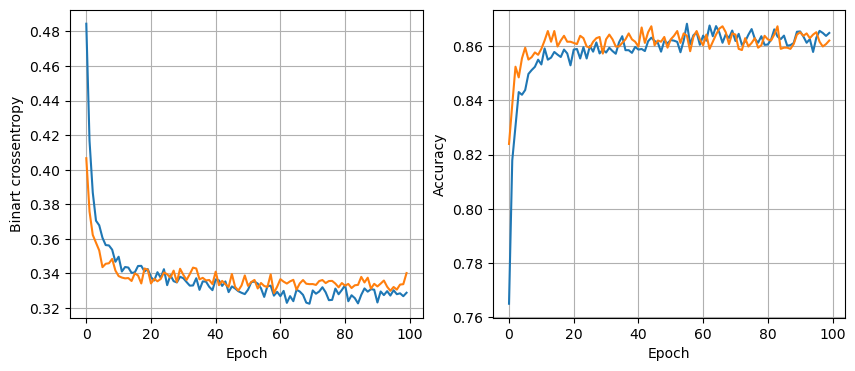

16 nodes, dropout 0.2, lr 0.005, batch_size 32


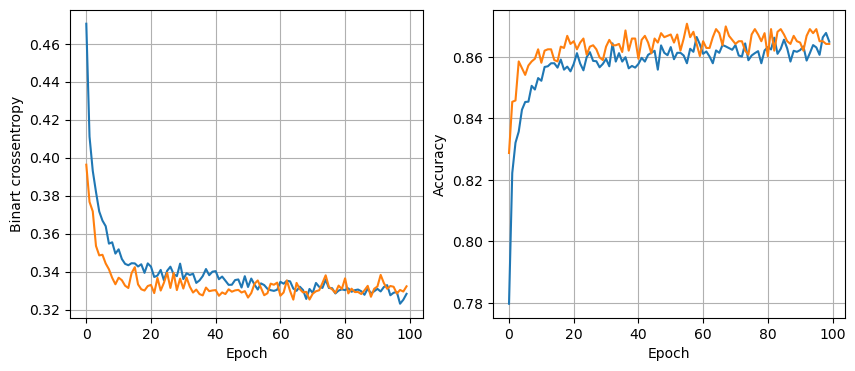

16 nodes, dropout 0.2, lr 0.005, batch_size 64


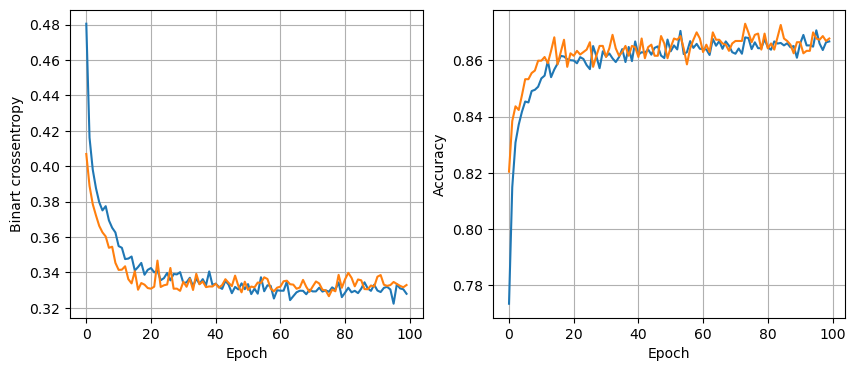

16 nodes, dropout 0.2, lr 0.005, batch_size 128


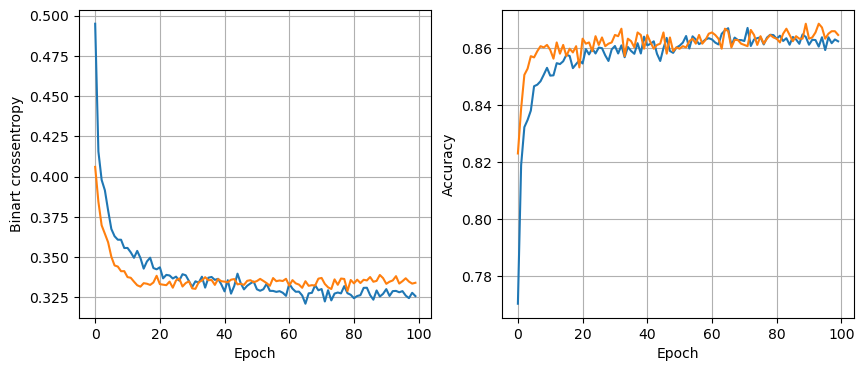

16 nodes, dropout 0.2, lr 0.001, batch_size 32


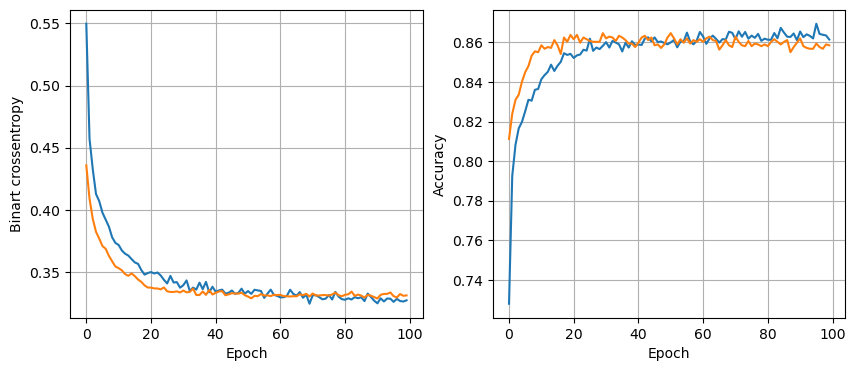

16 nodes, dropout 0.2, lr 0.001, batch_size 64


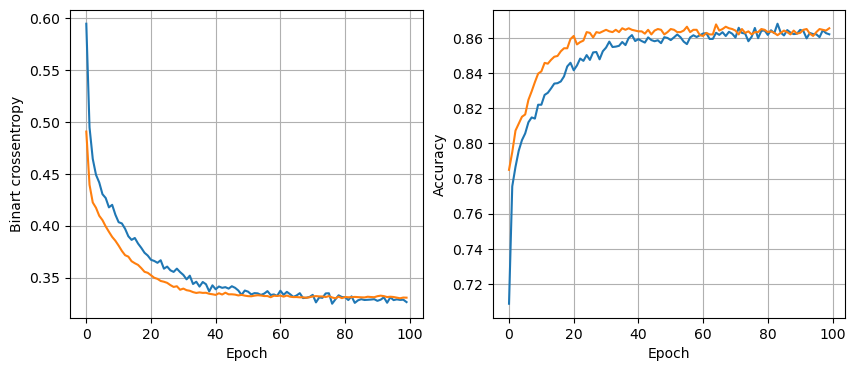

16 nodes, dropout 0.2, lr 0.001, batch_size 128


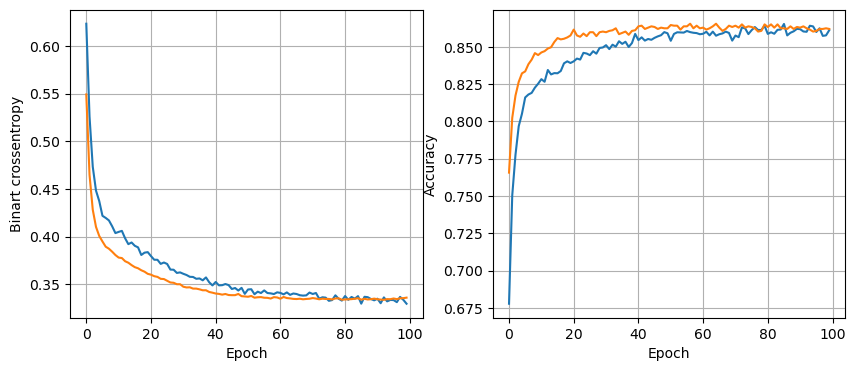

32 nodes, dropout 0, lr 0.01, batch_size 32


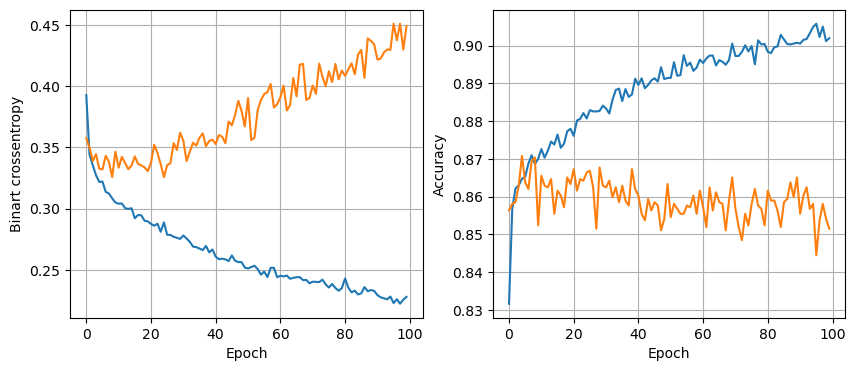

32 nodes, dropout 0, lr 0.01, batch_size 64


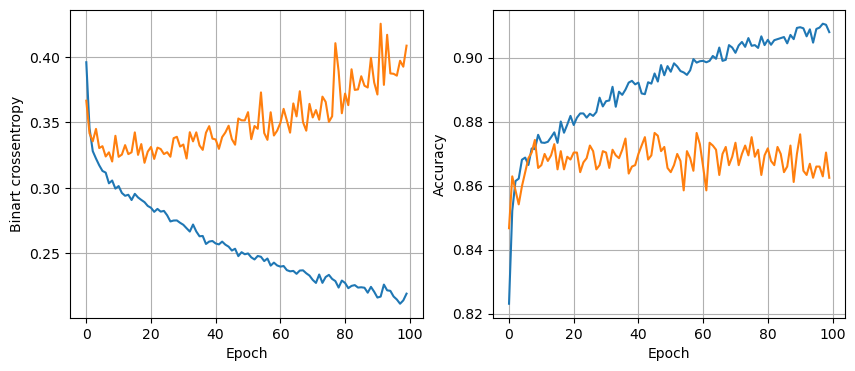

32 nodes, dropout 0, lr 0.01, batch_size 128


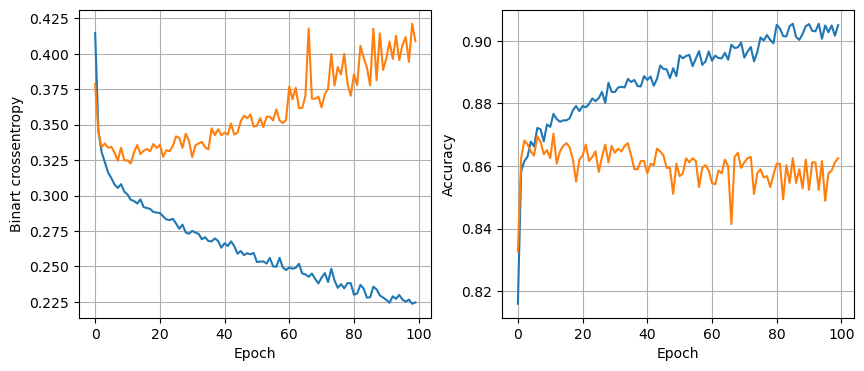

32 nodes, dropout 0, lr 0.005, batch_size 32


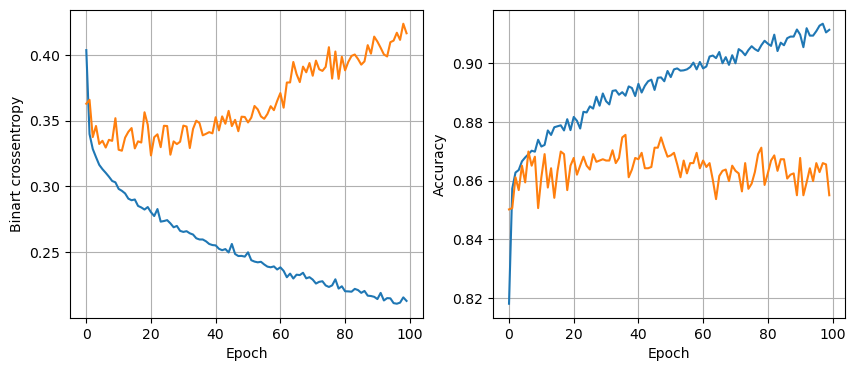

32 nodes, dropout 0, lr 0.005, batch_size 64


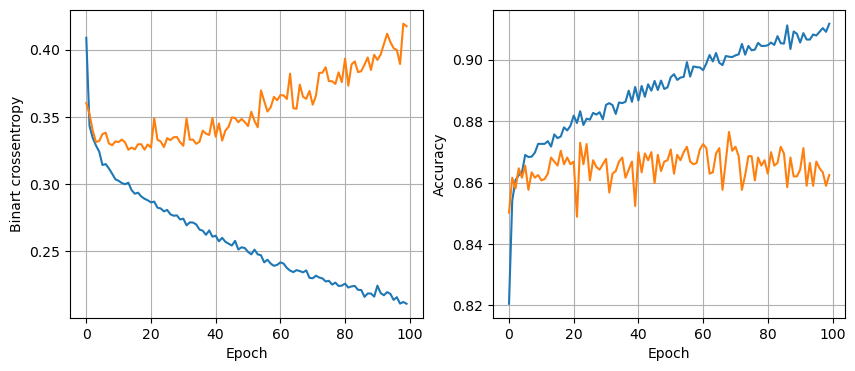

32 nodes, dropout 0, lr 0.005, batch_size 128


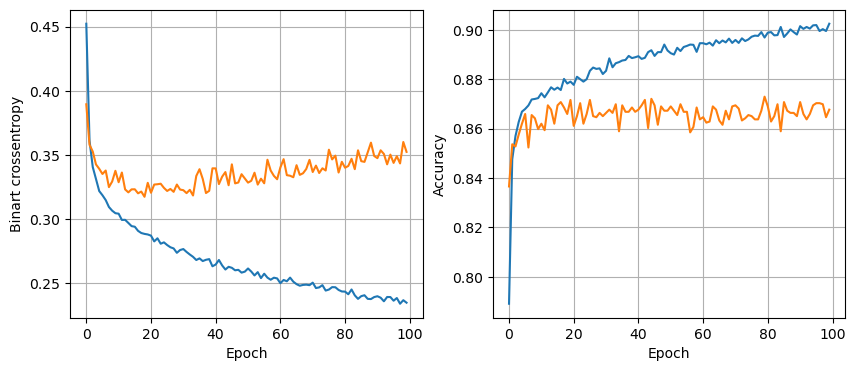

32 nodes, dropout 0, lr 0.001, batch_size 32


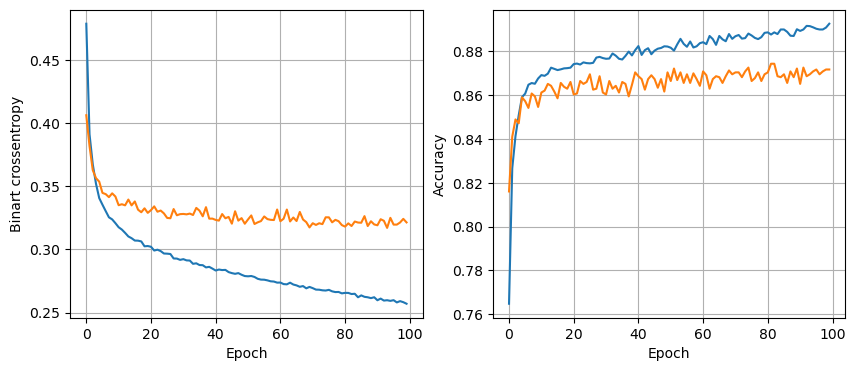

32 nodes, dropout 0, lr 0.001, batch_size 64


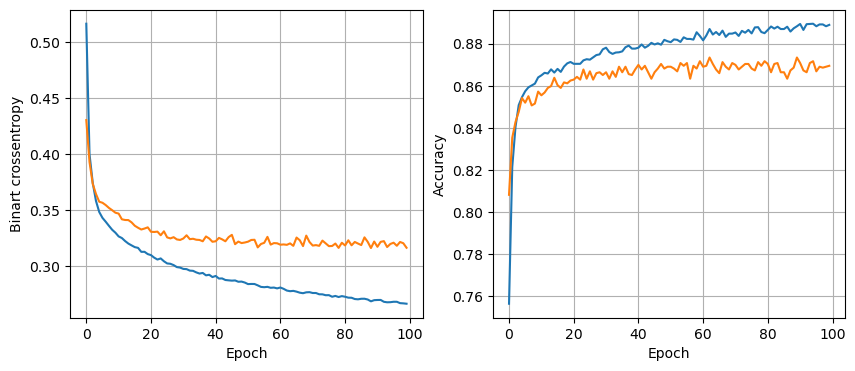

32 nodes, dropout 0, lr 0.001, batch_size 128


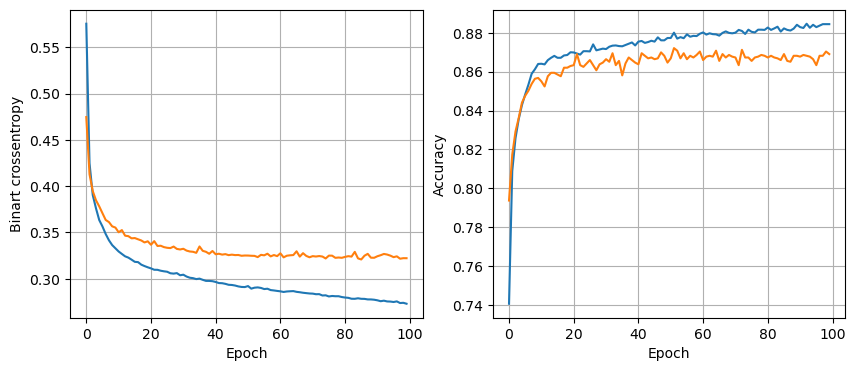

32 nodes, dropout 0.2, lr 0.01, batch_size 32


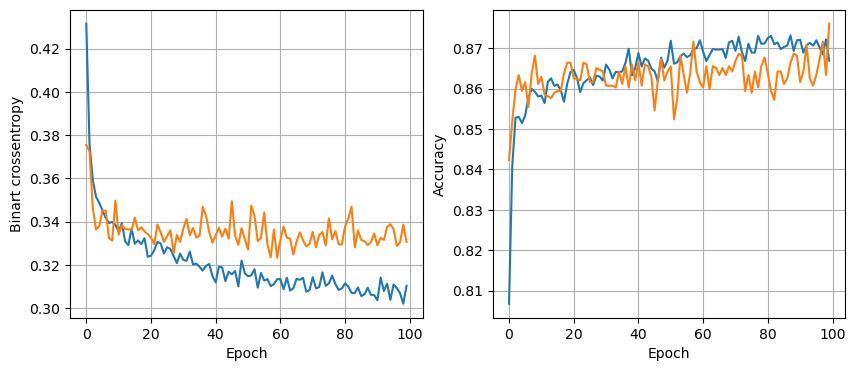

32 nodes, dropout 0.2, lr 0.01, batch_size 64


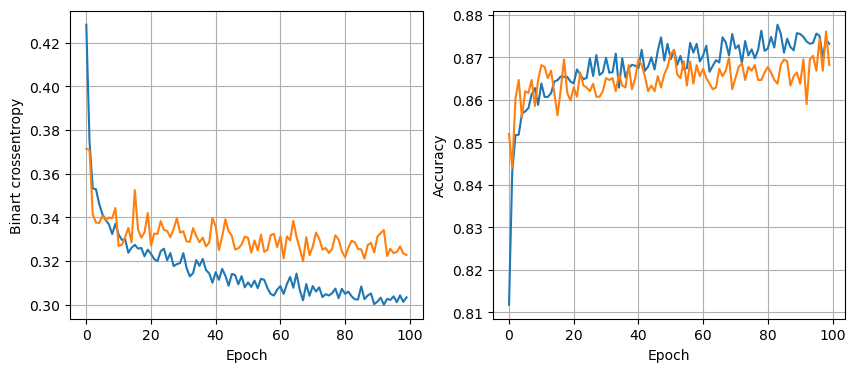

32 nodes, dropout 0.2, lr 0.01, batch_size 128


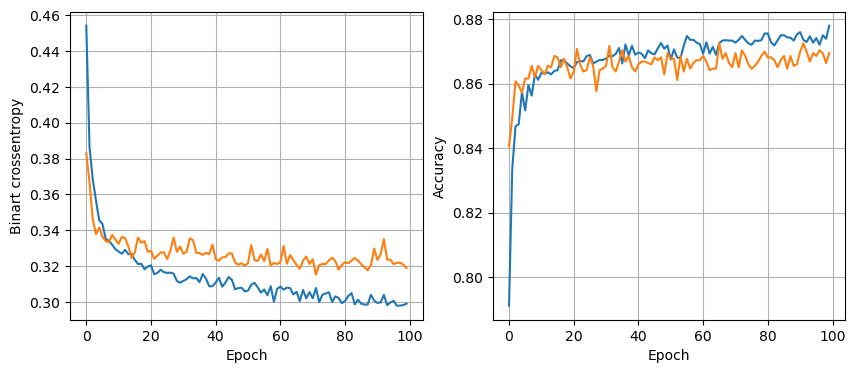

32 nodes, dropout 0.2, lr 0.005, batch_size 32


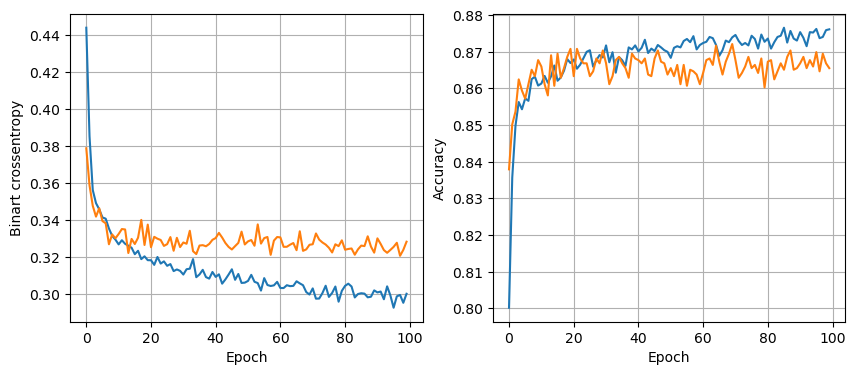

32 nodes, dropout 0.2, lr 0.005, batch_size 64


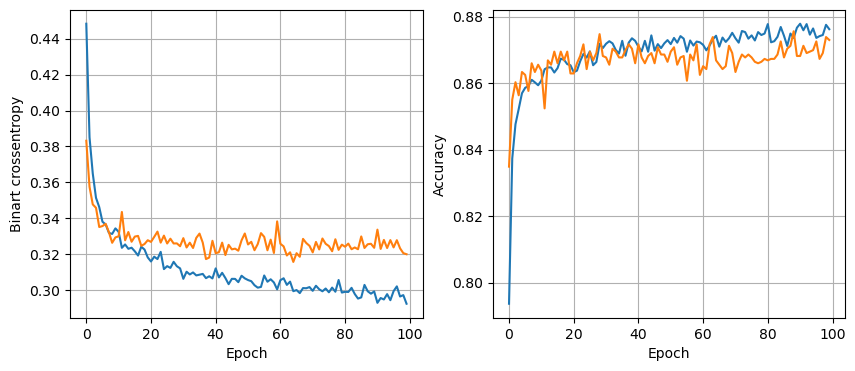

32 nodes, dropout 0.2, lr 0.005, batch_size 128


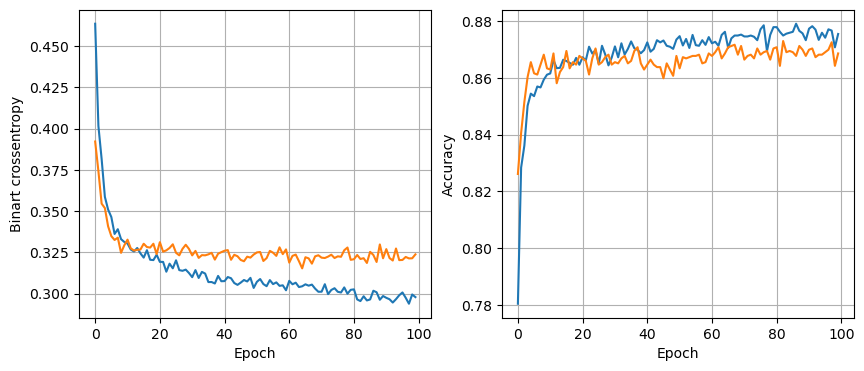

32 nodes, dropout 0.2, lr 0.001, batch_size 32


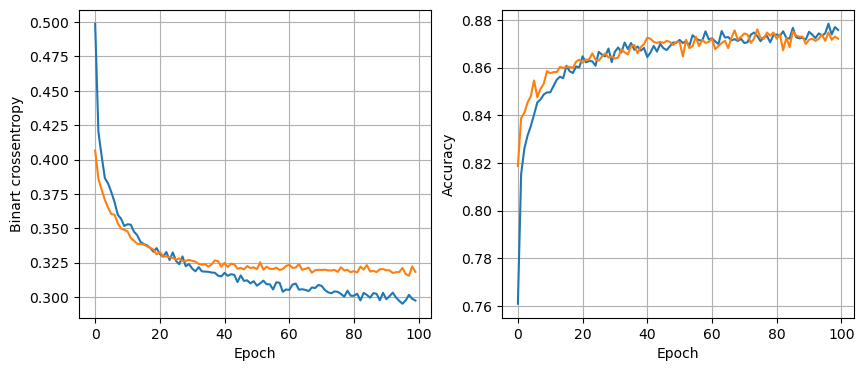

32 nodes, dropout 0.2, lr 0.001, batch_size 64


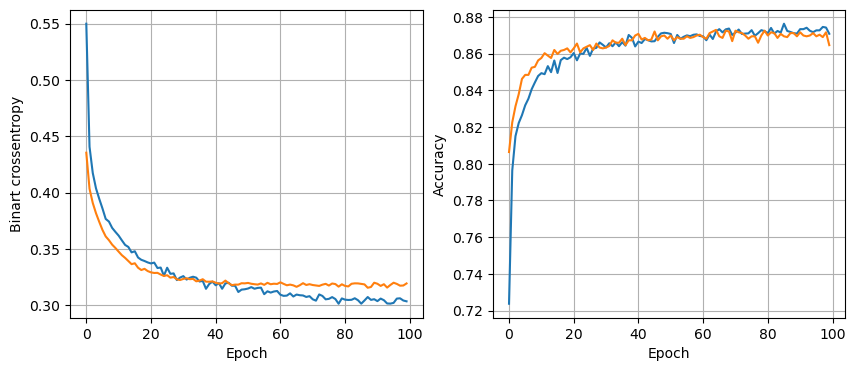

32 nodes, dropout 0.2, lr 0.001, batch_size 128


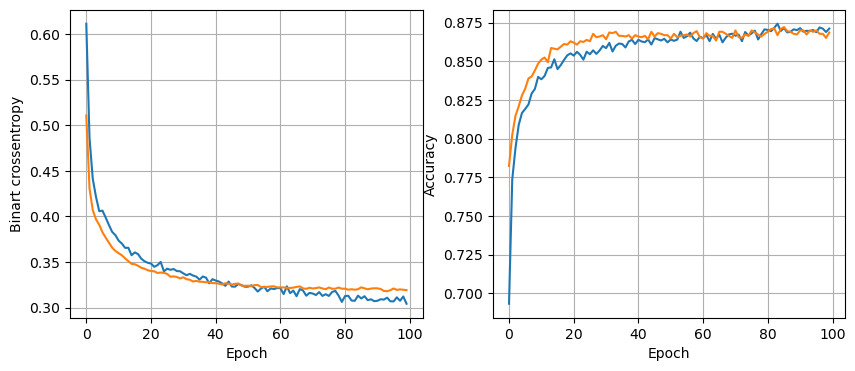

64 nodes, dropout 0, lr 0.01, batch_size 32


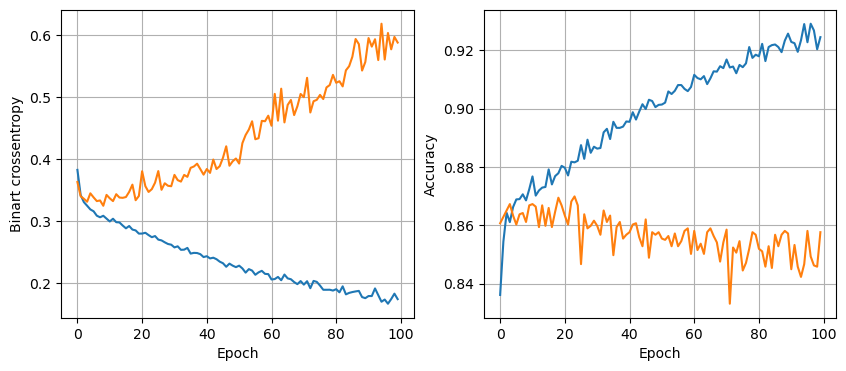

64 nodes, dropout 0, lr 0.01, batch_size 64


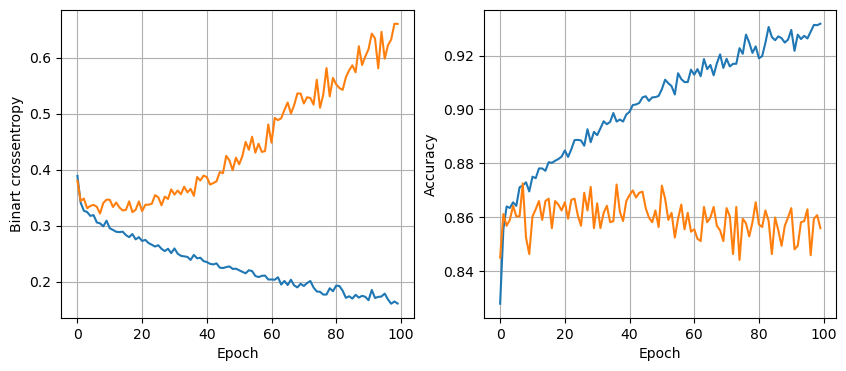

64 nodes, dropout 0, lr 0.01, batch_size 128


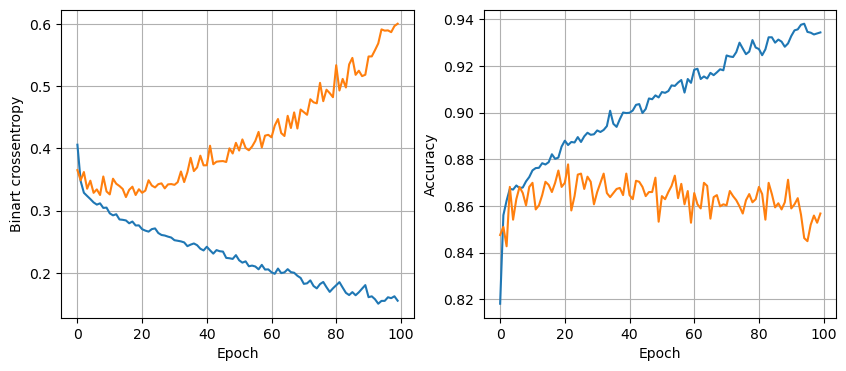

64 nodes, dropout 0, lr 0.005, batch_size 32


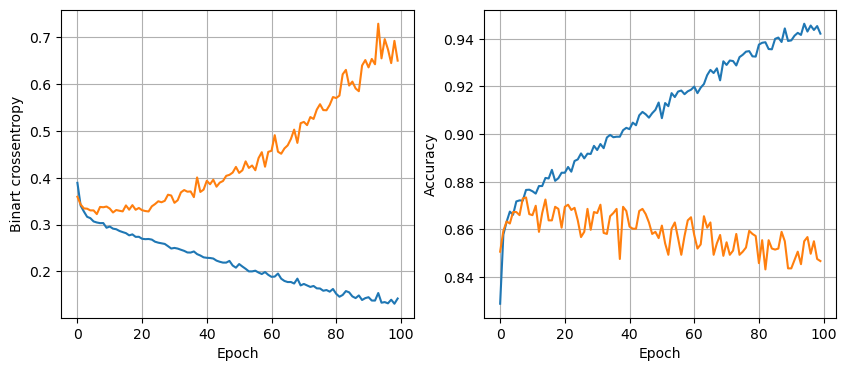

64 nodes, dropout 0, lr 0.005, batch_size 64


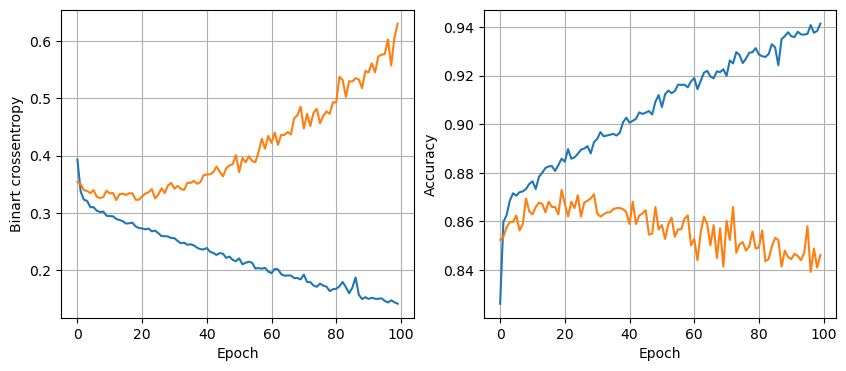

64 nodes, dropout 0, lr 0.005, batch_size 128


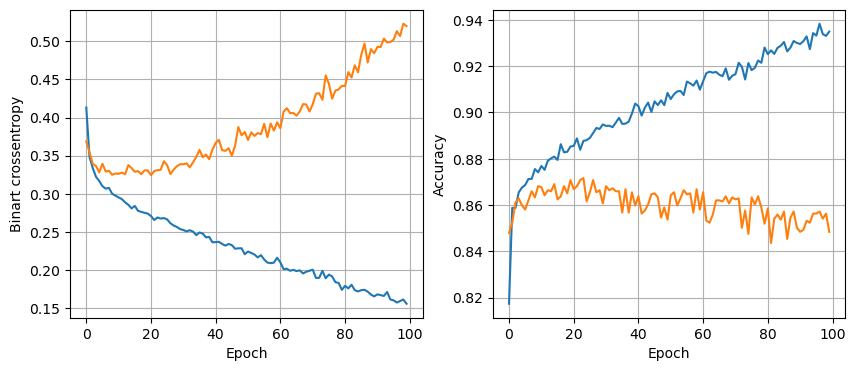

64 nodes, dropout 0, lr 0.001, batch_size 32


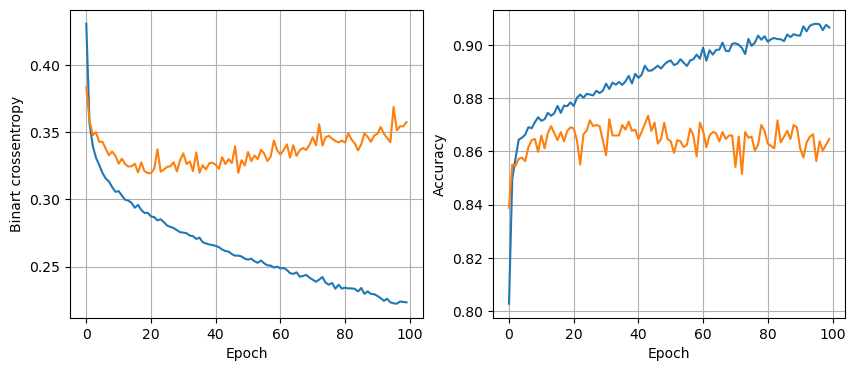

64 nodes, dropout 0, lr 0.001, batch_size 64


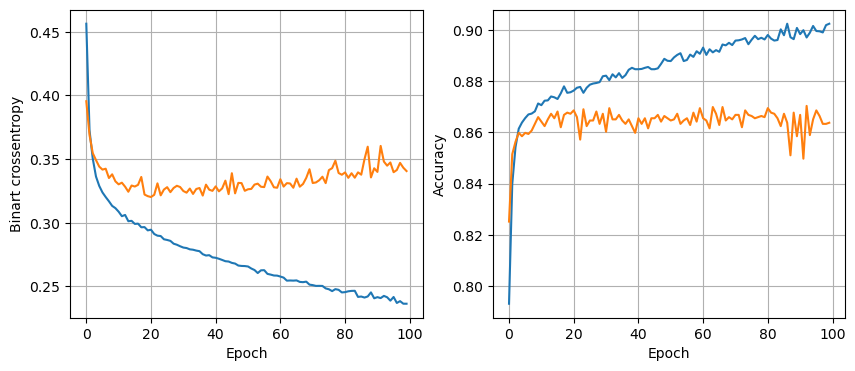

64 nodes, dropout 0, lr 0.001, batch_size 128


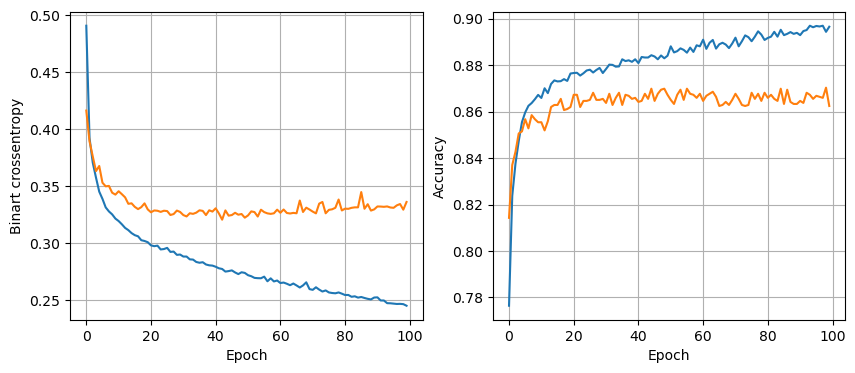

64 nodes, dropout 0.2, lr 0.01, batch_size 32


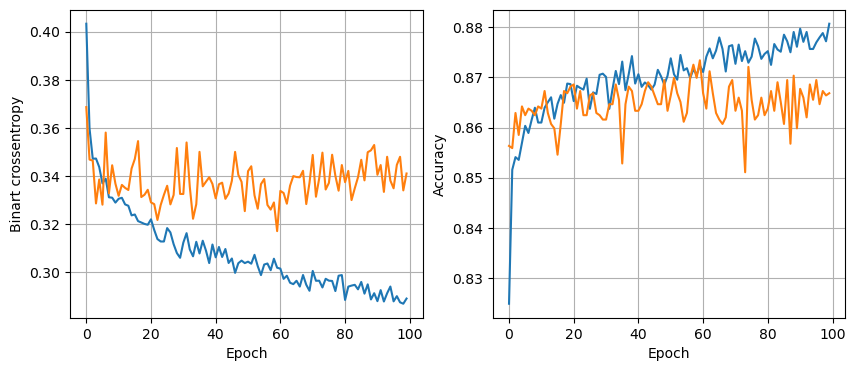

64 nodes, dropout 0.2, lr 0.01, batch_size 64


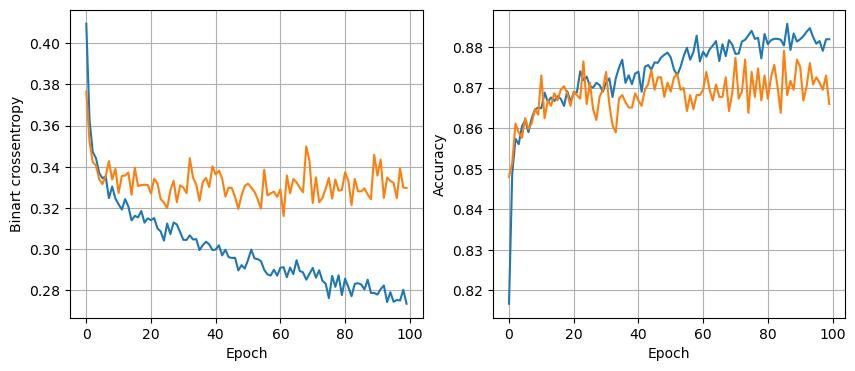

64 nodes, dropout 0.2, lr 0.01, batch_size 128


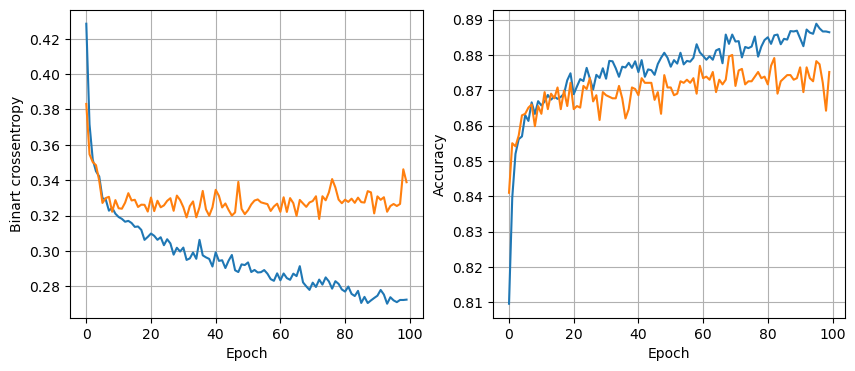

64 nodes, dropout 0.2, lr 0.005, batch_size 32


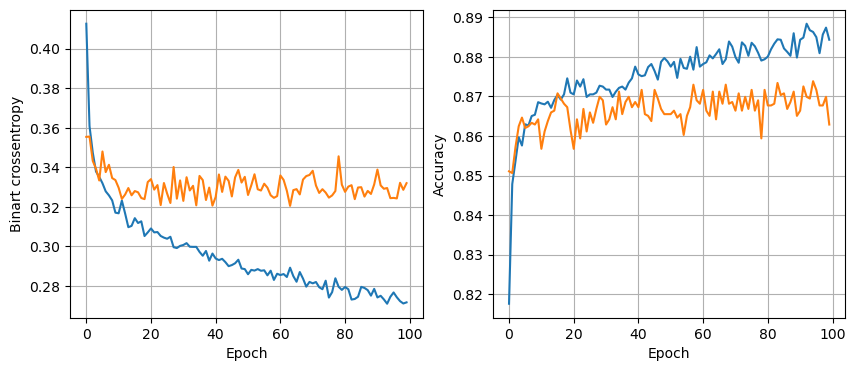

64 nodes, dropout 0.2, lr 0.005, batch_size 64


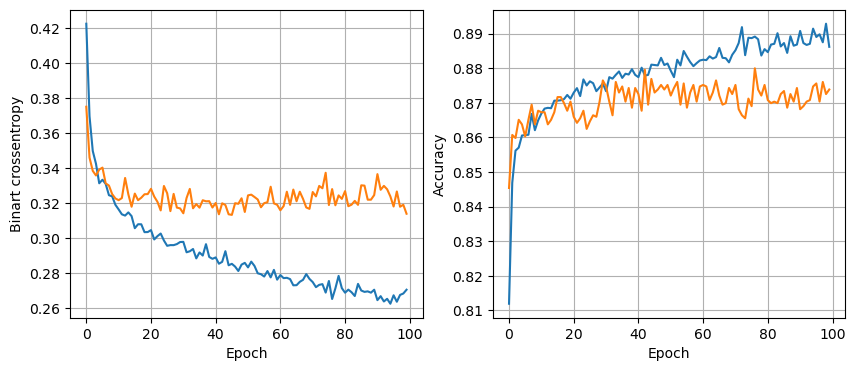

64 nodes, dropout 0.2, lr 0.005, batch_size 128


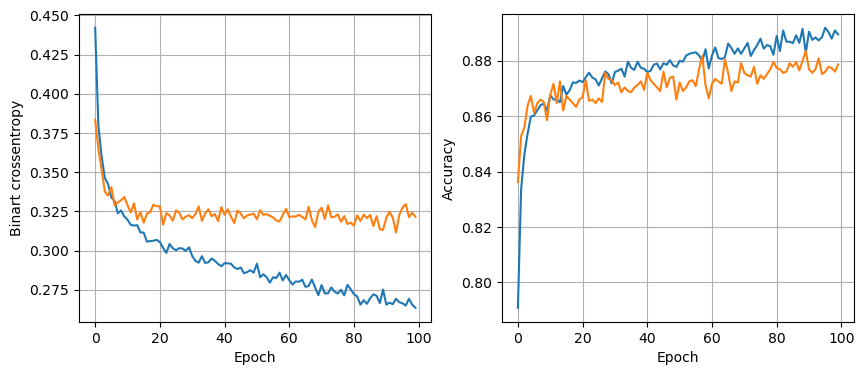

64 nodes, dropout 0.2, lr 0.001, batch_size 32


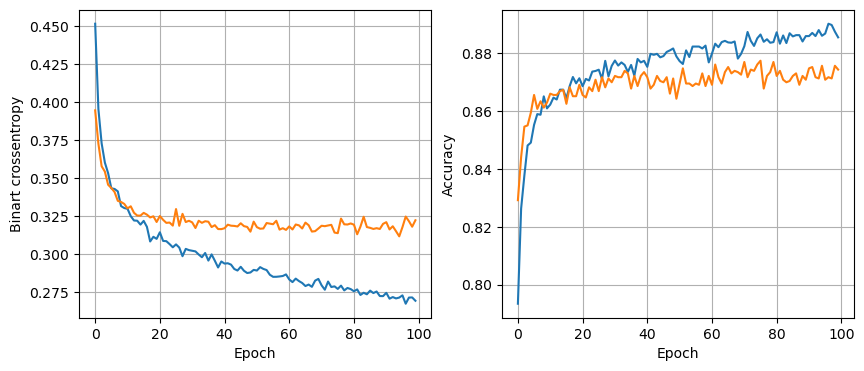

64 nodes, dropout 0.2, lr 0.001, batch_size 64


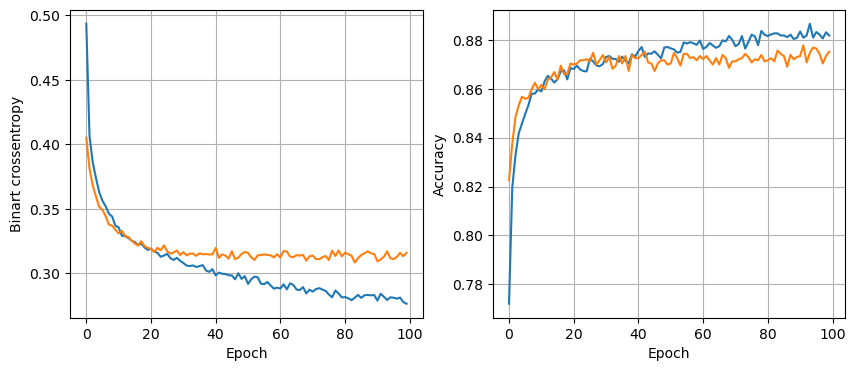

64 nodes, dropout 0.2, lr 0.001, batch_size 128


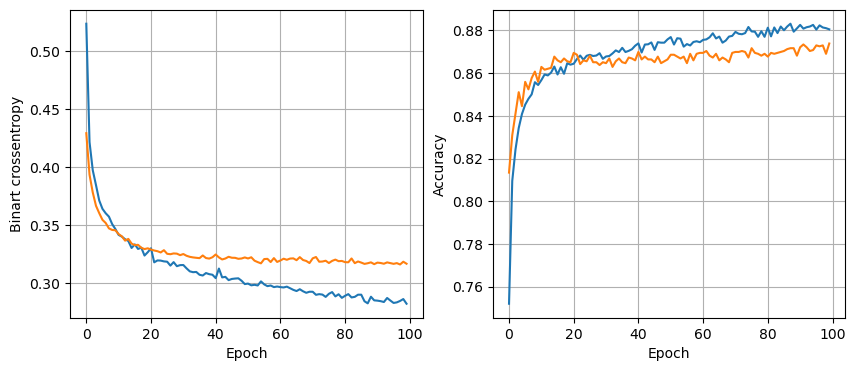

In [28]:
# least_val_loss = float('inf')
# least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
#                 val_loss = model.evaluate(X_valid, y_valid)
#                 if val_loss < least_val_loss:
#                     least_val_loss = val_loss
#                     least_loss_model = model

In [30]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

154/154 [==============================] - 0s 644us/step


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      2458
           1       0.79      0.94      0.86      2458

    accuracy                           0.84      4916
   macro avg       0.86      0.84      0.84      4916
weighted avg       0.86      0.84      0.84      4916

